# Plotting

In [5]:
import simpy
import numpy as np
import pandas as pd
import main
import matplotlib.pyplot as plt

In [22]:
custumer_interval_lambda = 1/3
moving_time_lambda = 2
scanning_time = 0.1
paying_time = 0.2
time_to_pick_item = np.array([0.1, 0.15, 0.1, 0.1, 0.15, 0.1, 0.2])
N = np.array([100, 150, 50, 150, 80, 40, 250])
refilling_time = np.array([60, 36, 42, 42, 30, 60, 90])

employeers_range = 10
simulations = 20

results = np.zeros((employeers_range, simulations))
for n_employyers in range(1, employeers_range+1):
    for i in range(simulations):
        sim = np.array(main.run_sim(n_employyers, custumer_interval_lambda, moving_time_lambda,
                                   scanning_time, paying_time, time_to_pick_item, N, refilling_time))
        results[n_employyers-1][i] = sim.mean()


df = pd.DataFrame(results, columns=[
                    f"Run {i}" for i in range(len(results[1]))])

In [23]:
df.transpose()
mean_vals = df.mean(axis=1)
std_vals = df.std(axis=1)

In [24]:
list(mean_vals), len(mean_vals)

([1.4376727187524652,
  2.1874621336518034,
  2.7329336237183717,
  2.88413315462899,
  2.9026248259157263,
  2.933285410623012,
  2.9349253013319294,
  2.9590661674679484,
  2.9610836937387797,
  2.917184610971849],
 10)

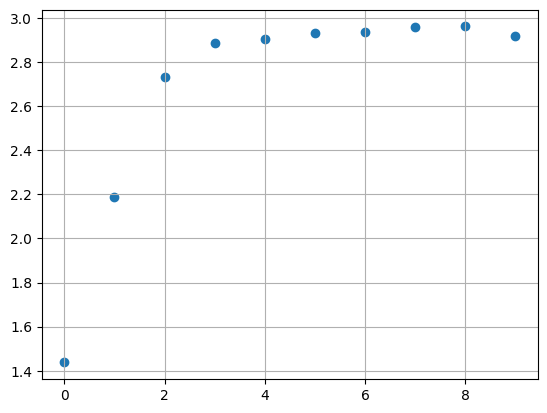

In [26]:
plt.scatter(range(len(mean_vals)), list(mean_vals))
plt.grid()


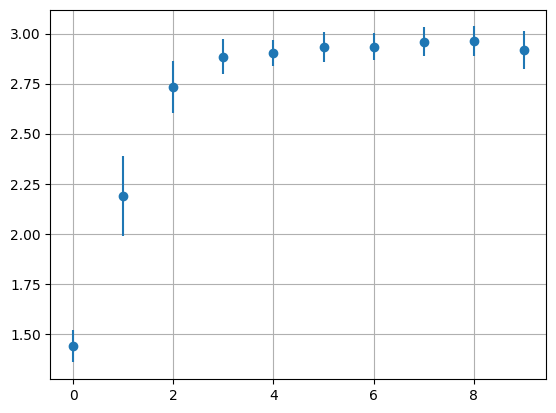

In [29]:
plt.errorbar(range(len(mean_vals)), list(mean_vals), yerr = list(std_vals), fmt="o")
plt.grid()